In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [59]:
df = pd.read_csv('hr_seattle.csv')

In [60]:
df.columns

Index(['title', 'salary', 'total_exper', 'company_exper', 'gender', 'race',
       'education'],
      dtype='object')

In [61]:
df.isna().sum()

title            0
salary           0
total_exper      0
company_exper    0
gender           2
race             0
education        0
dtype: int64

In [62]:
df.dropna(inplace=True)
df.isna().sum()

title            0
salary           0
total_exper      0
company_exper    0
gender           0
race             0
education        0
dtype: int64

## This analysis aims to assess the influence of factors such as gender and race on employee salaries and determine if there exists discrimination against any gender or racial group.

### Data Visualizations

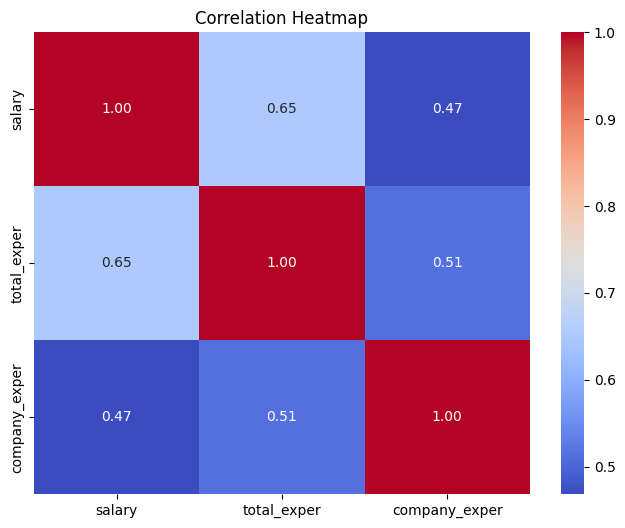

In [65]:
# Correlation heatmap
correlation_matrix = df[['salary', 'total_exper', 'company_exper']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Salary and Total Experience:
- A correlation of 0.65 indicates a moderate positive relationship, suggesting that more experience generally leads to higher salaries.

Salary and Company Experience:
- A correlation of 0.47 shows a weaker positive relationship, indicating company tenure also influences salary, but to a lesser extent than total experience.

Total and Company Experience:
- The correlation of 0.51 suggests a moderate relationship, as expected, since longer overall experience often includes longer tenure at the current company.

#### Gender

C:\Users\kiahm\AppData\Local\Temp\ipykernel_43904\2606847111.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='salary', data=df, palette="pastel")


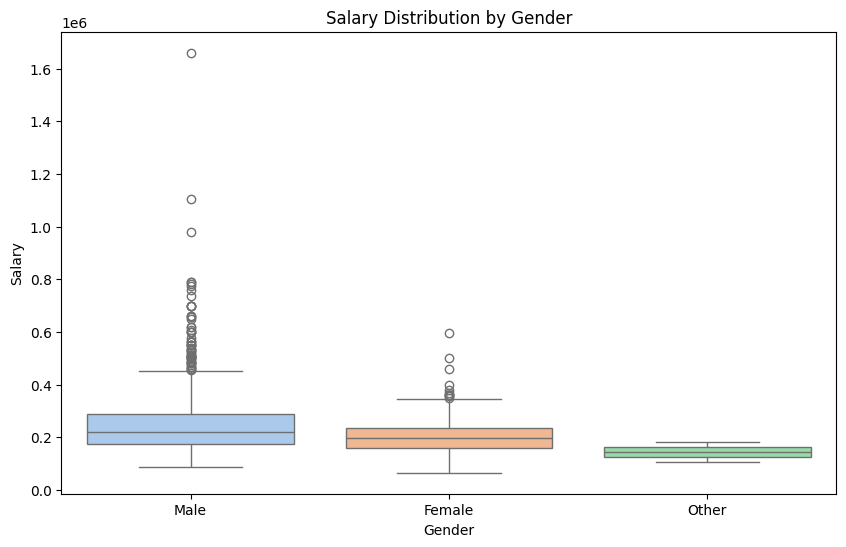

In [66]:
# Box plot of salary by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='salary', data=df, palette="pastel")
plt.title('Salary Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()

- The median salary is highest for males, followed by females and then the "Other" category. This suggests potential disparities across genders in the company.

- The spread of salaries, or IQR, is wider for males, indicating more variability in male salaries. This may suggest a broader range of roles or experiences within that group.

- Noticeable outliers exist, especially among males, where some salaries are significantly higher, possibly representing senior or specialized roles.

- Fewer outliers are present among females and the "Other" category, indicating less variability in extremely high-paying positions.

- The "Other" category shows a more compact salary distribution, suggesting consistent salary bands.

<Figure size 1200x600 with 0 Axes>

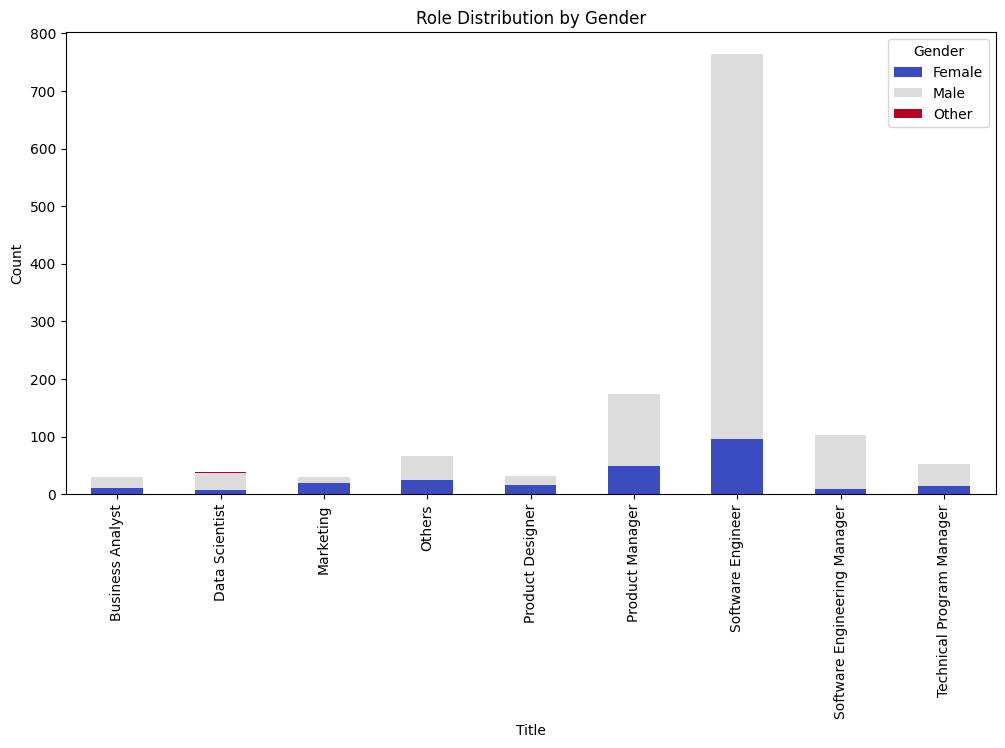

In [67]:
# Role Distribution: Bar plot of role counts by gender
plt.figure(figsize=(12, 6))
role_gender_counts = df.groupby(['title', 'gender']).size().unstack().fillna(0)
role_gender_counts.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(12, 6))
plt.title('Role Distribution by Gender')
plt.xlabel('Title')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Gender')
plt.show()

- Majority of employees are software engineers, with males predominantly occupying this role.

- There is a noticeable gender imbalance in some roles, such as software engineering, where males significantly outnumber females and "Other."

- Other roles, such as product managers and data scientists, also show a skewed distribution, though with more balanced representation than software engineering.

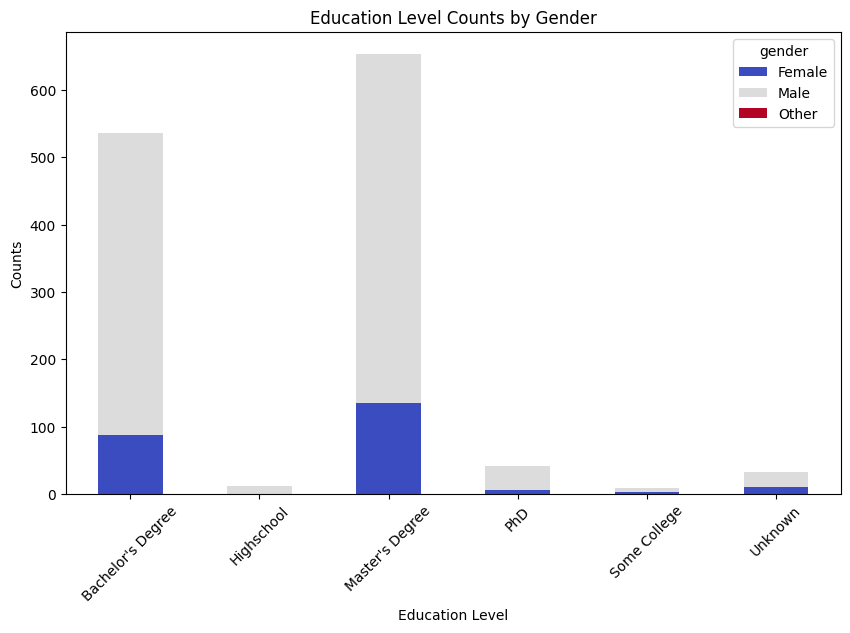

In [68]:
# Stacked bar chart for education level counts by gender
edu_gender_counts = df.groupby(['education', 'gender']).size().unstack()
edu_gender_counts.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(10, 6))
plt.title('Education Level Counts by Gender')
plt.xlabel('Education Level')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

- Most employees have Bachelor's or Master's degrees.

- Males dominate both categories, with fewer females and "Other" category employees.

- PhD and other advanced degrees have a smaller representation, with similar gender distribution patterns.

- Noticeable gender disparity, especially in advanced degrees, could impact role and salary dynamics.

- Higher education levels often align with higher-paying roles, potentially contributing to salary disparities.

#### Race

C:\Users\kiahm\AppData\Local\Temp\ipykernel_43904\2575935578.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='race', y='salary', data=df, palette="muted")


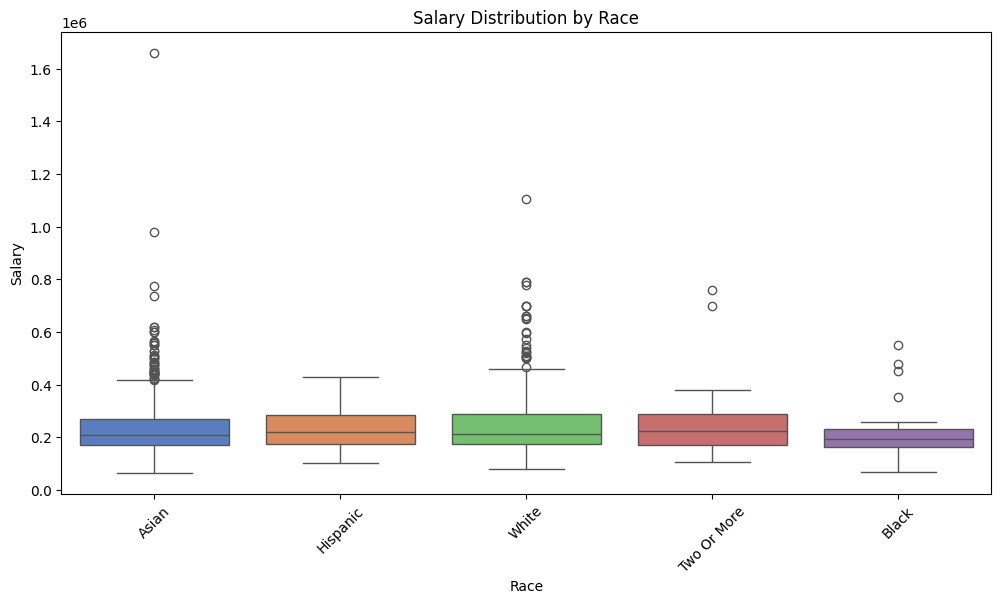

In [69]:
# Box plot of salary by race
plt.figure(figsize=(12, 6))
sns.boxplot(x='race', y='salary', data=df, palette="muted")
plt.title('Salary Distribution by Race')
plt.xlabel('Race')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()

- Median salaries appear relatively consistent across races, indicating no extreme disparities in central tendency.

- The White and Asian categories show a wider range of salaries, suggesting more variability in earnings within these groups.

- The Hispanic and Black categories have a more compact distribution, indicating less variation.

- Outliers are present in all groups, particularly in the White and Asian categories, suggesting higher-end salaries within these groups.

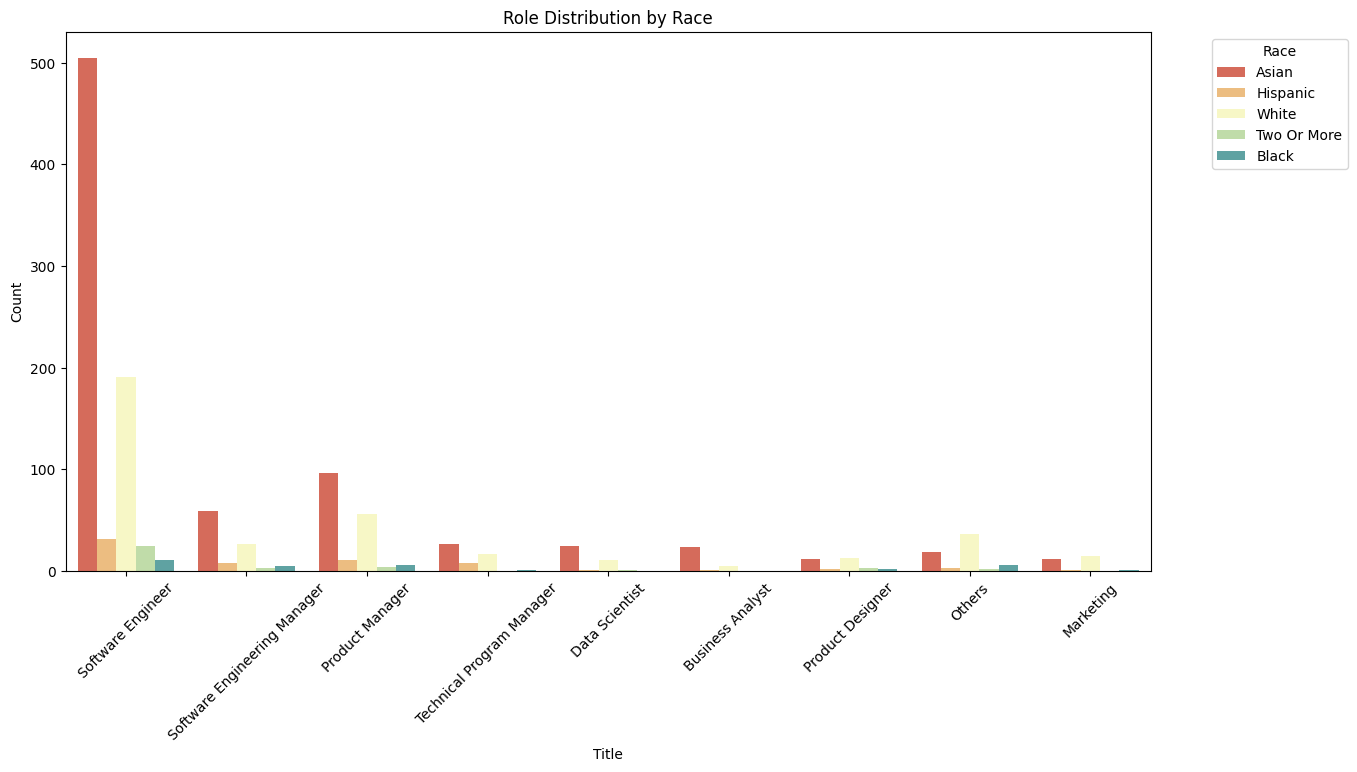

In [70]:
# Count plot of roles by race
plt.figure(figsize=(14, 7))
sns.countplot(x='title', hue='race', data=df, palette="Spectral")
plt.title('Role Distribution by Race')
plt.xlabel('Title')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

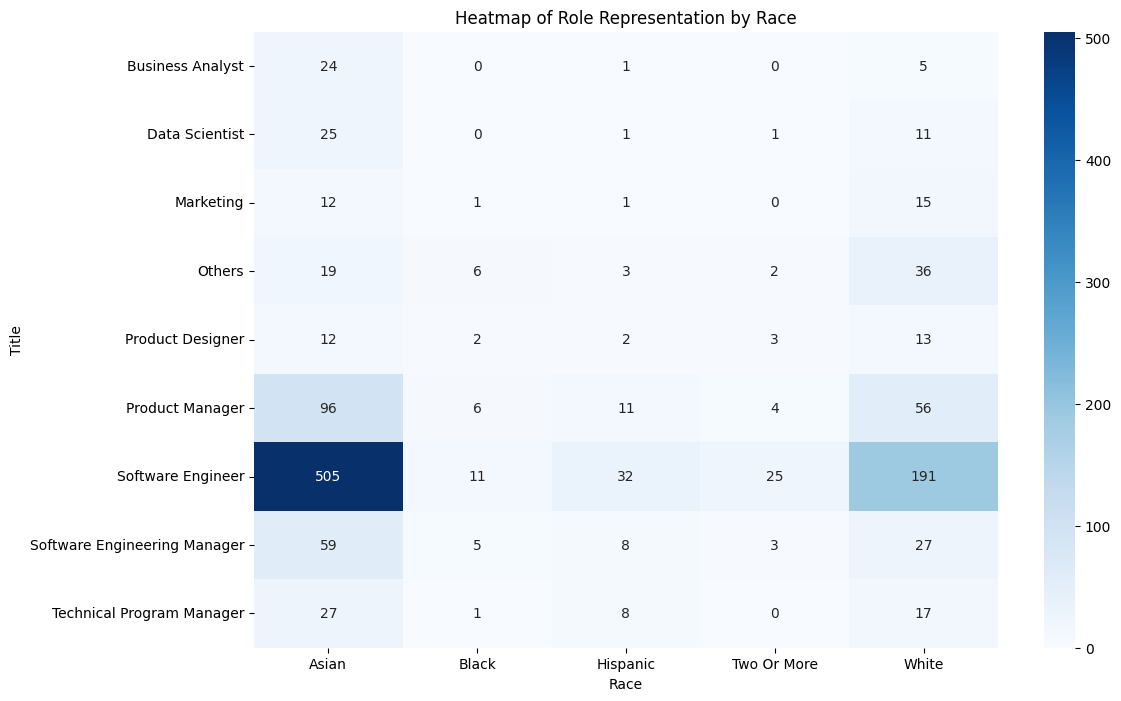

In [71]:
# Heatmap of representation
role_race_counts = df.groupby(['title', 'race']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(role_race_counts, annot=True, cmap='Blues', fmt='g')
plt.title('Heatmap of Role Representation by Race')
plt.xlabel('Race')
plt.ylabel('Title')
plt.show()

- The software engineer role is predominantly occupied by White and Asian employees, indicating significant concentration within these groups.

- Other roles, such as product manager and data scientist, have more balanced racial representation, though still showing some skewness.

- Hispanic, Black, and "Two or More" categories appear less represented in several roles, highlighting potential gaps in diversity.

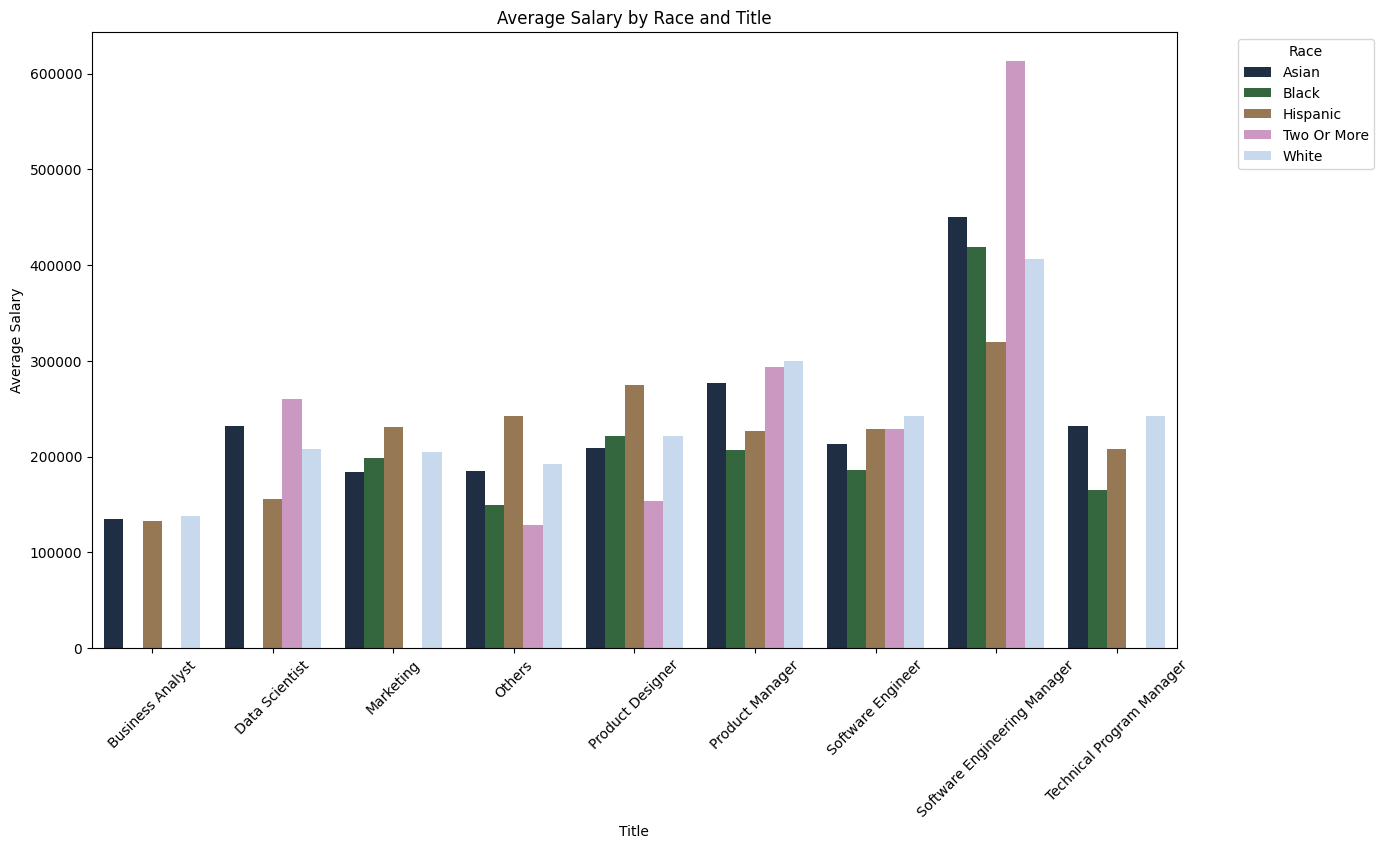

In [72]:
# Average salary by race and title
avg_salary_by_race_title = df.groupby(['race', 'title'])['salary'].mean().reset_index()
plt.figure(figsize=(14, 8))
sns.barplot(x='title', y='salary', hue='race', data=avg_salary_by_race_title, palette="cubehelix")
plt.title('Average Salary by Race and Title')
plt.xlabel('Title')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- Certain roles, such as software engineering manager and software engineer, show higher average salaries, with variability among races.

- In some roles, specific racial groups consistently earn higher average salaries, indicating potential disparities.

- Differences in average salaries within the same role suggest that race may play a part in salary determination beyond role definitions.

C:\Users\kiahm\AppData\Local\Temp\ipykernel_43904\1351216016.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='race', y='salary', data=avg_salary_by_race, palette="viridis")


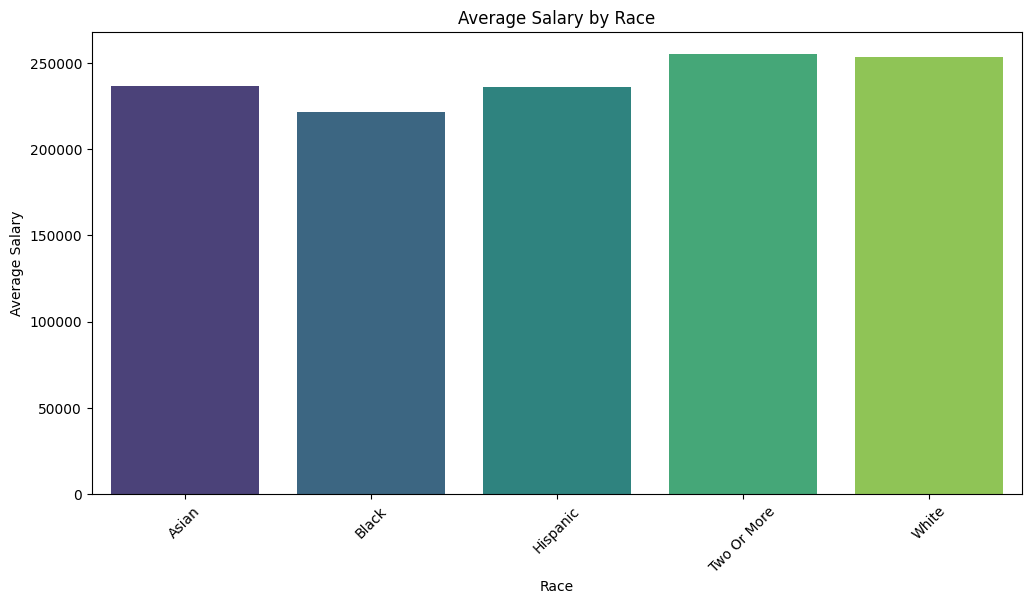

In [73]:
# Bar plot for average salary by race
plt.figure(figsize=(12, 6))
avg_salary_by_race = df.groupby('race')['salary'].mean().reset_index()
sns.barplot(x='race', y='salary', data=avg_salary_by_race, palette="viridis")
plt.title('Average Salary by Race')
plt.xlabel('Race')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()

- White and "Two or More" races have slightly higher average salaries compared to other groups.

- Black and Hispanic groups show somewhat lower average salaries.

### Statistical Tests

In [74]:
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm

#### T-test for salary differences between genders

In [75]:
gender_groups = df.groupby('gender')['salary']
t_stat, p_val_gender = stats.ttest_ind(gender_groups.get_group('Male'), gender_groups.get_group('Female'), equal_var=False)
print(f'T-test for gender salary differences: t-stat={t_stat}, p-value={p_val_gender}')

T-test for gender salary differences: t-stat=7.740890195026767, p-value=4.238689034873044e-14


P-Value: 4.24e-14

At 5% significance level, the extremely small p-value (much less than 0.05) indicates a statistically significant difference in average salaries between male and female employees. This means we can reject the null hypothesis that there is no salary difference between genders.

#### ANOVA for salary differences between races

In [76]:
# ANOVA for salary differences between races
race_model = ols('salary ~ C(race)', data=df).fit()
anova_table = sm.stats.anova_lm(race_model, typ=2)
print(anova_table)


                sum_sq      df         F    PR(>F)
C(race)   9.507161e+10     4.0  1.813852  0.123707
Residual  1.679876e+13  1282.0       NaN       NaN


P-Value (PR(>F)): 0.131796

This p-value is greater than the common alpha level of 0.05, suggesting that the differences in average salaries across race groups are not statistically significant at the 5% significance level

In [84]:
# Encode categorical variables
df['gender_encoded'] = df['gender'].map({'Male': 0, 'Female': 1, 'Other': 2})
df['race_encoded'] = df['race'].astype('category').cat.codes

# Convert education to categorical and create dummy variables
education_dummies = pd.get_dummies(df['education'], drop_first=True)

# Define your dependent and independent variables
X = pd.concat([df[['total_exper', 'company_exper', 'gender_encoded', 'race_encoded']], education_dummies], axis=1)
y = df['salary']

# Ensure all data is numeric and handle missing values
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)
X = X.astype({col: int for col in X.select_dtypes(include=['bool']).columns})
y = y.apply(pd.to_numeric, errors='coerce').fillna(0)

# Add a constant to the model
X = sm.add_constant(X)

In [83]:
# Fit the model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     123.0
Date:                Tue, 22 Oct 2024   Prob (F-statistic):          3.38e-166
Time:                        02:05:06   Log-Likelihood:                -16417.
No. Observations:                1287   AIC:                         3.285e+04
Df Residuals:                    1277   BIC:                         3.291e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.431e+05   5399.753     

In [85]:
summary_df = pd.DataFrame({
    'Coefficient': model.params,
    'Standard Error': model.bse,
    't-value': model.tvalues,
    'P>|t|': model.pvalues
})

In [92]:
significant_predictors = summary_df[summary_df['P>|t|'] < 0.05]

print("Significant Predictors:")
print(significant_predictors)

Significant Predictors:
                  Coefficient  Standard Error    t-value          P>|t|
const           143075.180989     5399.753312  26.496614  1.217712e-123
total_exper      11290.672735      521.609736  21.645824   9.201637e-89
company_exper     7521.285759      972.099015   7.737160   2.053635e-14
gender_encoded  -29889.653624     5980.719002  -4.997669   6.608976e-07
PhD              50415.362261    13592.823003   3.708969   2.170355e-04


C:\Users\kiahm\AppData\Local\Temp\ipykernel_43904\1459849442.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


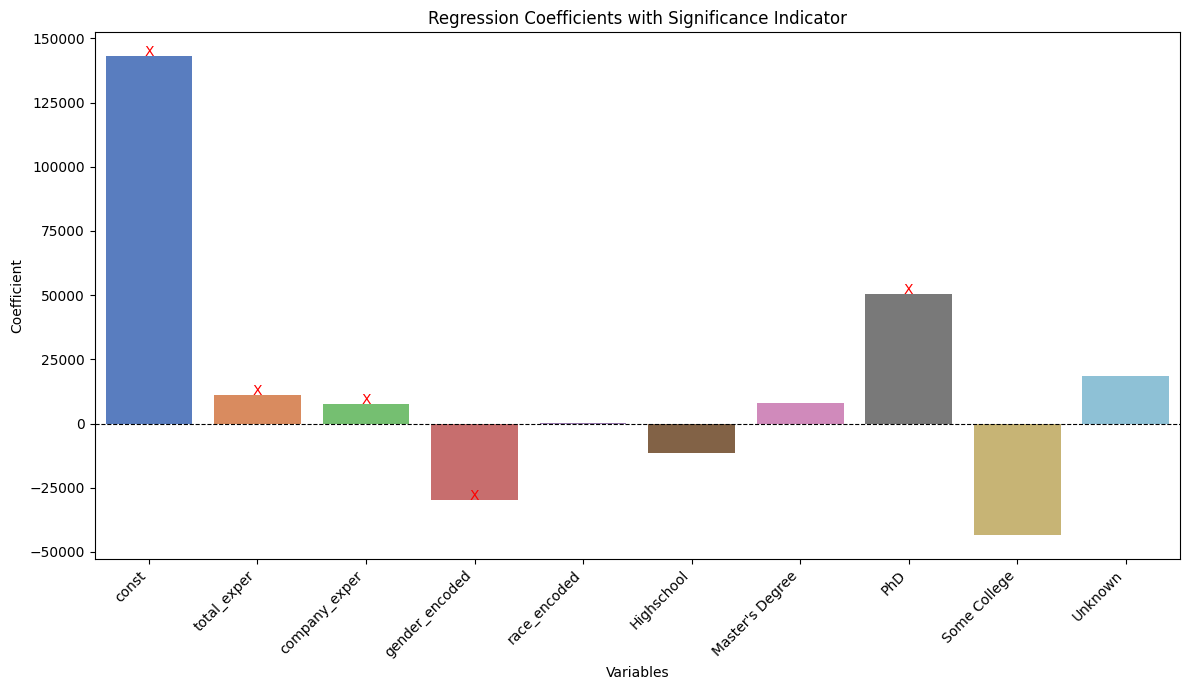

In [91]:
# Plotting coefficients with significance markers
plt.figure(figsize=(12, 7))
sns.barplot(
    x=summary_df.index,
    y='Coefficient',
    data=summary_df,
    palette='muted'
)

# Annotate bars with significance levels
for index, row in summary_df.iterrows():
    if row['P>|t|'] < 0.05:
        plt.text(index, row['Coefficient'], 'X', color='red', ha='center')

plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.title('Regression Coefficients with Significance Indicator')
plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel('Coefficient')
plt.xlabel('Variables')
plt.tight_layout()
plt.show()


Overall Model Fit:
- R-squared (0.464): This indicates that approximately 46.4% of the variability in salary can be explained by the model. This means a moderate level of explanatory power, suggesting other factors might also have a substantial impact on salary not captured in this model.

Statistical Significance:
- F-statistic (123.0) and Prob (F-statistic): Indicates that the overall regression model is statistically significant (p-value is very small), meaning that at least one of the predictors is contributing to the explanation of the variance in salaries.

Coefficients and Their Interpretation:
- const (Intercept): The intercept of the model is 1.431e+05, suggesting an estimated base salary of about $143,100 when all other variables are zero, assuming such a scenario exists practically.

- total_exper: The coefficient is 1.129e+04, which implies that for each additional year of total experience, salary increases by approximately $11,290, provided other factors are constant.

- company_exper: This coefficient (7521.2858) suggests that each additional year of experience at the company is associated with an increase in salary of around $7,521.

- gender_encoded: A negative coefficient (-2.989e+04) indicates that being in the gender group encoded with a higher value (often 1) is associated with a decrease in salary by about $29,890. This may suggest gender disparities in salary, given the statistical significance.

- race_encoded: The positive but statistically insignificant coefficient (236.4644) suggests race, as encoded, does not have a significant effect on salary in this model.

Education Levels:
- Highschool, Some College, and Unknown: These have insignificant coefficients, suggesting these educational levels do not significantly impact salary when other factors are controlled for.

- Master's Degree: The coefficient is not significant, indicating it might not have a considerable effect.

- PhD: The coefficient (5.042e+04) is positive and significant at a $50,420 increase, suggesting that holding a PhD has a significant positive impact on salary.

Conclusion:

The model identifies significant factors influencing salary, such as total and company experience and gender. It suggests a positive impact from higher education (PhD), acknowledging existing disparities potentially due to gender. The moderate R-squared suggests further refinement of the model or inclusion of more variables could improve the explanatory power.